In [43]:
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from datetime import date
import requests
import undetected_chromedriver as uc
import urllib.parse


<!DOCTYPE html>
<html lang="en-US">
   <head>
      <title>Access denied</title>
      <meta http-equiv="X-UA-Compatible" content="IE=Edge" />
      <meta name="robots" content="noindex, nofollow" />
      <meta name="viewport" content="width=device-width,initial-scale=1" />
      <link rel="stylesheet" href="/cdn-cgi/styles/errors.css" media="screen" />
      <script>
(function(){if(document.addEventListener&&window.XMLHttpRequest&&JSON&&JSON.stringify){var e=function(a){var c=document.getElementById("error-feedback-survey"),d=document.getElementById("error-feedback-success"),b=new XMLHttpRequest;a={event:"feedback clicked",properties:{errorCode:1020,helpful:a,version:5}};b.open("POST","https://sparrow.cloudflare.com/api/v1/event");b.setRequestHeader("Content-Type","application/json");b.setRequestHeader("Sparrow-Source-Key","c771f0e4b54944bebf4261d44bd79a1e");
b.send(JSON.stringify(a));c.classList.add("feedback-hidden");d.classList.remove("feedback-hidden")};document.addEventListener(
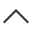

In [20]:
res = requests.get('https://www.indeed.com/jobs?q=Software+Developer')
print(res.text)


In [21]:
driver = uc.Chrome()

In [22]:
driver.get('https://www.indeed.com/jobs?q=Software+Developer')
sleep(5)
html = driver.page_source
print(html)

<html dir="ltr" lang="en" class="js-focus-visible" data-js-focus-visible=""><head>
    <link rel="shortcut icon" href="/images/favicon.ico">
    <title>Flexible Software Developer Jobs | Indeed.com</title>
    <meta http-equiv="content-type" content="text/html; charset=utf-8">
    <meta name="description" content="107,238 Software Developer jobs available on Indeed.com. Apply to Software Engineer, Front End Developer, Junior Software Engineer and more!">
    <meta name="keywords" content="Software Developer Jobs, Employment,  careers,  employment,  job listings,  job search,  search engine, work in ">
    <meta name="referrer" content="origin-when-cross-origin">
    <link rel="canonical" href="https://www.indeed.com/q-Software-Developer-jobs.html">
    <link rel="alternate" href="android-app://com.indeed.android.jobsearch/https/www.indeed.com/m/jobs?q=Software+Developer">
    <link rel="alternate" href="ios-app://https/www.indeed.com/m/jobs?q=Software+Developer">
    <link rel="alterna

In [23]:
soup = BeautifulSoup(html, 'html.parser')

In [24]:
jobs_list = soup.find('div', attrs={'id': 'mosaic-provider-jobcards'})


In [25]:
df = pd.DataFrame()


In [26]:
titles = [title.text for title in jobs_list.find_all('h2', class_='jobTitle')]
df['Job_Title'] = titles

In [33]:
links = [link['href'] for link in jobs_list.find_all('a', class_= 'jcs-JobTitle')]
df['Link'] = links
df

,Job_Title,Company,Link
0,VB.Net Developer,Dunham's Sports,/pagead/clk?mo=r&ad=-6NYlbfkN0DvPtH4wAACkKDdsI...
1,Senior Software User Interface Designer and De...,American Electronic Warfare Associates,/pagead/clk?mo=r&ad=-6NYlbfkN0CSTfppak0prN0wMN...
2,Full Stack Software Engineer - JAVA | Cloud,Fidelity Investments,/pagead/clk?mo=r&ad=-6NYlbfkN0BW1y-sVf2FbT16t_...
3,IT Software Engineer,"Valued Relationships, Inc.",/pagead/clk?mo=r&ad=-6NYlbfkN0BurH2O65ySSsZhl7...
4,Software Engineer - Remote,Liberty Mutual Insurance,/pagead/clk?mo=r&ad=-6NYlbfkN0DepOg7TDxGKZPUDK...
5,Software Engineer,BringFido,/pagead/clk?mo=r&ad=-6NYlbfkN0BOVqvX0EAZzpgx0o...
6,Senior Software Engineer,Southeastern Comp Consultants Inc,/pagead/clk?mo=r&ad=-6NYlbfkN0BmbW_Cj2dWOnfuvi...
7,Software Developer - Entry Level,Urban League,/rc/clk?jk=1d6bfc89104dfa9e&fccid=0366d60ddd8e...
8,Junior Software Developer,Vetro Tech Inc,/company/Vetro-Tech-Inc/jobs/Junior-Software-D...
9,Software Developer - Digital,Costco Wholesale,/rc/clk?jk=9a6ede25a79e09df&fccid=9b77e2b0ccfb...


In [28]:
'''
titles = []

for title in jobs_list.find_all('h2', class_='jobTitle'):
    titles.append(title.text)
'''

"\ntitles = []\n\nfor title in jobs_list.find_all('h2', class_='jobTitle'):\n    titles.append(title.text)\n"

In [31]:
companies = [company.text for company in jobs_list.find_all('span', class_='companyName')]
df['Company'] = companies
df

,Job_Title,Company
0,VB.Net Developer,Dunham's Sports
1,Senior Software User Interface Designer and De...,American Electronic Warfare Associates
2,Full Stack Software Engineer - JAVA | Cloud,Fidelity Investments
3,IT Software Engineer,"Valued Relationships, Inc."
4,Software Engineer - Remote,Liberty Mutual Insurance
5,Software Engineer,BringFido
6,Senior Software Engineer,Southeastern Comp Consultants Inc
7,Software Developer - Entry Level,Urban League
8,Junior Software Developer,Vetro Tech Inc
9,Software Developer - Digital,Costco Wholesale


In [34]:
url = 'https://indeed.com' + links[0]
print(url)

https://indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DvPtH4wAACkKDdsIARU6nZkiFTaWV3F7L-8yZpqzEeR7AXjoF5rHCVqU6Ytu2Y77BqogDzIqCUPOJZOPUgjRA25bCPGd0cWksR1bnknZKVdcWd227SeZRBOUYYOE-W9nRD8Kh6_CX8YC0JcW7BDDkgieuiAxtCOYsHvTmE1rchhvz4sgrbKeD1ZFduKDCbVse3Cy1ZILKZajE5uvKNHWF8-l68b-Eway85zwBVSkigySUmFSq0OTetuSnCaKJ7UTpvE9IsfAAjl3o5WnT39IacPKCcncY3aYo3FzGJ0YFpaQj7bbKd7uXmwKf_0J_qf8zndWuXcqoyUuzBGCgyU4nxlPbeBwZbp8Nep17QBZszWM7CNU632vfZegEU3I2bae2ysm8gUVd24KGHxauX6S7yVrdokCKrtJTx6oHwUlW8DwdQvKvt5l5yRC6tRxd2XzHhPRBF5TQ1ZbZk5gVwTsUddxbHc34K0chf6sOxGRbJ7LBZgwORpyw0pUEqIZQP2wZjWou25zyOIw==&xkcb=SoBQ-_M3SNRUwIwjtJ0LbzkdCdPP&p=0&fvj=1&vjs=3


In [35]:
descriptions = []

for link in links:
    url = 'https://indeed.com' + link
    try:
        driver.get(url)
        sleep(5)
    except:
        descriptions.append('')
        continue
    html = driver.page_source
    cup = BeautifulSoup(html, 'html.parser')
    description = cup.find('div', id = 'jobDescriptionText')
    descriptions.append(description.text)

len(descriptions)

["Dunham’s Sports opened its doors as Dunham’s Bait & Tackle in 1937 as a sporting goods store in the suburbs of Detroit. During the following years, Dunham has prospered in the Detroit area as a specialty retailer of sporting goods. In 1985, we began to expand, opened several stores in the Midwest, and are now operating over 250 stores across 25 states.\nWe carry a complete line of sporting goods and athletic equipment, plus a wide variety of sports and leisure apparel. Our philosophy is simple – offer customers a choice of several name brand products at the lowest price possible.\nDunham's Sports located in Troy, MI has an immediate opening for a full-time in-house VB.Net developer. (Non remote or Hybrid)\nLooking for a self-motivated individual that will be developing and modifying our store RF functions and ensure stability and ease of support is delivered as we rollout changes and enhancements to support retail store efficiencies.\nThis requires VB.net experience developer (NOT VB

In [36]:
len(descriptions)

15

In [37]:
df['Job_Description'] = descriptions

In [38]:
df

,Job_Title,Company,Link,Job_Description
0,VB.Net Developer,Dunham's Sports,/pagead/clk?mo=r&ad=-6NYlbfkN0DvPtH4wAACkKDdsI...,Dunham’s Sports opened its doors as Dunham’s B...
1,Senior Software User Interface Designer and De...,American Electronic Warfare Associates,/pagead/clk?mo=r&ad=-6NYlbfkN0CSTfppak0prN0wMN...,"\n AMEWAS, Inc., is a Department of Defense (D..."
2,Full Stack Software Engineer - JAVA | Cloud,Fidelity Investments,/pagead/clk?mo=r&ad=-6NYlbfkN0BW1y-sVf2FbT16t_...,\n\nJob Description:\n Full Stack Software Eng...
3,IT Software Engineer,"Valued Relationships, Inc.",/pagead/clk?mo=r&ad=-6NYlbfkN0BurH2O65ySSsZhl7...,\n Overview: \n \n Responsible for the desig...
4,Software Engineer - Remote,Liberty Mutual Insurance,/pagead/clk?mo=r&ad=-6NYlbfkN0DepOg7TDxGKZPUDK...,"\n\n\n At Liberty Mutual, technology isn't j..."
5,Software Engineer,BringFido,/pagead/clk?mo=r&ad=-6NYlbfkN0BOVqvX0EAZzpgx0o...,Software Engineer\nFull-time – Remote\nWe’re l...
6,Senior Software Engineer,Southeastern Comp Consultants Inc,/pagead/clk?mo=r&ad=-6NYlbfkN0BmbW_Cj2dWOnfuvi...,\nOverview\n SCCI is seeking a Senior Software...
7,Software Developer - Entry Level,Urban League,/rc/clk?jk=1d6bfc89104dfa9e&fccid=0366d60ddd8e...,"Urban League is looking for a passionate, expe..."
8,Junior Software Developer,Vetro Tech Inc,/company/Vetro-Tech-Inc/jobs/Junior-Software-D...,We are looking for an enthusiastic junior soft...
9,Software Developer - Digital,Costco Wholesale,/rc/clk?jk=9a6ede25a79e09df&fccid=9b77e2b0ccfb...,\n\nCostco IT is responsible for the technical...


In [39]:
df.Link = df.Link.apply(lambda link: 'https://indeed.com' + link) 


In [41]:
df.Link[0]

'https://indeed.com/pagead/clk?mo=r&ad=-6NYlbfkN0DvPtH4wAACkKDdsIARU6nZkiFTaWV3F7L-8yZpqzEeR7AXjoF5rHCVqU6Ytu2Y77BqogDzIqCUPOJZOPUgjRA25bCPGd0cWksR1bnknZKVdcWd227SeZRBOUYYOE-W9nRD8Kh6_CX8YC0JcW7BDDkgieuiAxtCOYsHvTmE1rchhvz4sgrbKeD1ZFduKDCbVse3Cy1ZILKZajE5uvKNHWF8-l68b-Eway85zwBVSkigySUmFSq0OTetuSnCaKJ7UTpvE9IsfAAjl3o5WnT39IacPKCcncY3aYo3FzGJ0YFpaQj7bbKd7uXmwKf_0J_qf8zndWuXcqoyUuzBGCgyU4nxlPbeBwZbp8Nep17QBZszWM7CNU632vfZegEU3I2bae2ysm8gUVd24KGHxauX6S7yVrdokCKrtJTx6oHwUlW8DwdQvKvt5l5yRC6tRxd2XzHhPRBF5TQ1ZbZk5gVwTsUddxbHc34K0chf6sOxGRbJ7LBZgwORpyw0pUEqIZQP2wZjWou25zyOIw==&xkcb=SoBQ-_M3SNRUwIwjtJ0LbzkdCdPP&p=0&fvj=1&vjs=3'

In [44]:
df.to_csv(f'indeed_{date.today()}.csv')
df.to_json(f'indeed_{date.today()}.json')
